In [ ]:
#intro

#APPUNTI:
#

In [1]:
%pip install matplotlib networkx numpy scipy

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 2.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.6 MB 2.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.6 MB 2.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.6 MB 2.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.6 MB 2.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.6 MB 2.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 2.5 MB/s eta 0:00:01
   ---------------------- ----------------- 0.9/1.6 MB 2.5 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.6 MB 2.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.1/1.6 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.6 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.6 MB 2.4 MB/s eta 0:00:01
   ----------------

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import norm

In [10]:
df = pd.read_csv(r'csv/witcher_network.csv')
df = df.drop("Type", axis=1)
df = df.drop("Unnamed: 0", axis=1)
df

,Source,Target,Weight,book
0,Velerad,Geralt,1,1
1,Geralt,Foltest,5,1
2,Foltest,Geralt,4,1
3,Adda,Geralt,1,1
4,Geralt,Ostrit,4,1
...,...,...,...,...
2595,Lytta,Ciri,2,7
2596,Lytta,Triss,1,7
2597,Triss,Dandelion,1,7
2598,Triss,Yarpen,1,7


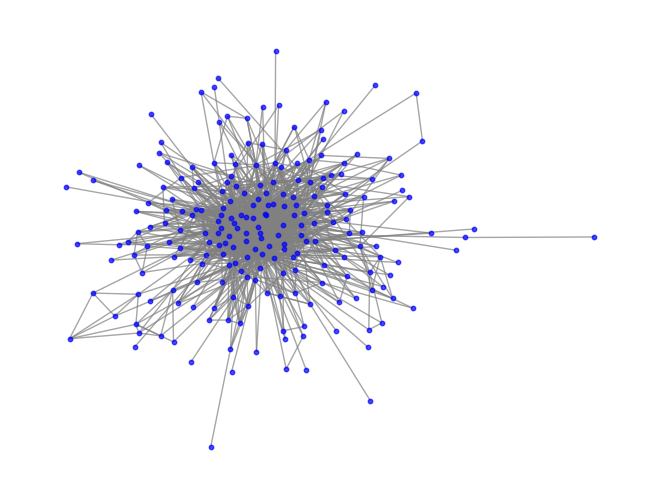

In [12]:
#troppo distanti dal resto e rovinano la visualizzazione
df = df.drop(df.index[df['Source'] == 'Vreemde'])
df = df.drop(df.index[df['Source'] == 'Morteisen'])
df = df.drop(df.index[df['Target'] == 'Vreemde'])
df = df.drop(df.index[df['Target'] == 'Morteisen'])

# Creare un grafo da DataFrame utilizzando NetworkX
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['Weight'])

# Plottare il grafo con i pesi sugli archi senza etichette sui nodi
pos = nx.spring_layout(G)
edge_labels = {(row['Source'], row['Target']): row['Weight'] for index, row in df.iterrows()}
nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# Mostrare il plot
plt.show()

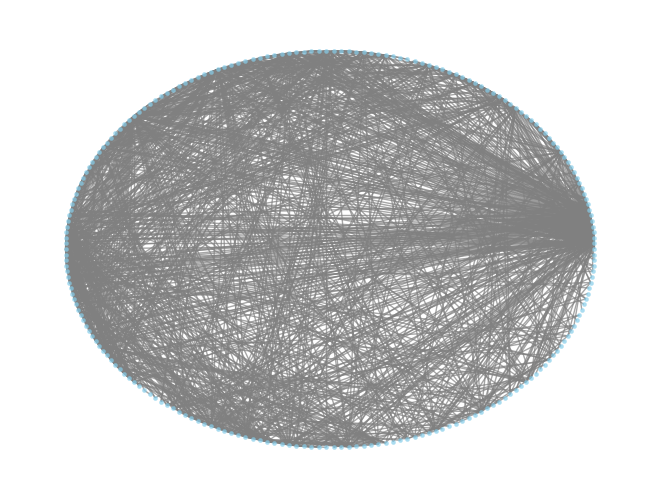

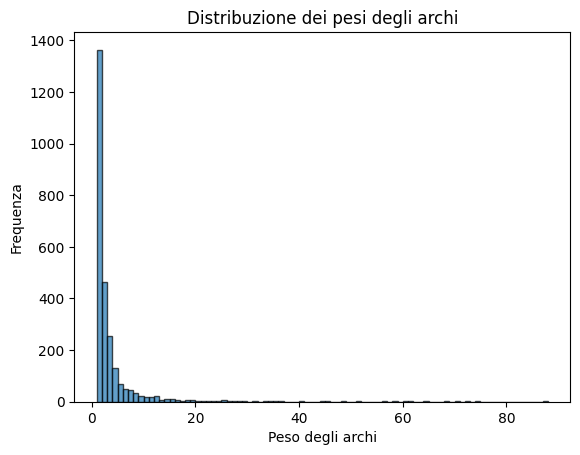

In [14]:
pos_circular = nx.circular_layout(G)
nx.draw(G, pos_circular, with_labels=False, node_size=10, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='grey', linewidths=0.1, alpha=0.7)
# Mostrare il plot
plt.show()
# Visualizzare la distribuzione dei pesi in un istogramma
pesi = df['Weight']
plt.hist(pesi, bins=range(min(pesi), max(pesi) + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Peso degli archi')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei pesi degli archi')
plt.show()

In [13]:
#prendiamo i più importanti
most_influential = nx.degree_centrality(G)
 
characters = []
 
for w in sorted(G, key=most_influential.get, reverse=True):
    characters.append([w,most_influential[w]])
    sorted_influential = (w, most_influential[w])
    print(w, most_influential[w])
 
 
top_characters = characters[0:10]
print(top_characters)
bottom_characters = characters[-10:]
print(bottom_characters)

Geralt 0.6199095022624435
Ciri 0.46153846153846156
Yennefer 0.3257918552036199
Dandelion 0.31221719457013575
Emhyr 0.28054298642533937
Triss 0.20361990950226247
Philippa 0.20361990950226247
Vilgefortz 0.1990950226244344
King 0.19457013574660637
Calanthe 0.17647058823529413
Two 0.16742081447963802
Milva 0.14932126696832582
Foltest 0.14479638009049775
Cahir 0.14479638009049775
Rience 0.14027149321266968
Zoltan 0.14027149321266968
Count 0.13574660633484165
Sir 0.13574660633484165
Sabrina 0.13574660633484165
Francesca 0.13574660633484165
Baron 0.13122171945701358
Falka 0.12669683257918554
Assire 0.12669683257918554
Fringilla 0.12217194570135748
Aen 0.11764705882352942
Pavetta 0.1085972850678733
Vissegerd 0.10407239819004525
Little 0.10407239819004525
Gar 0.0995475113122172
Tissaia 0.0995475113122172
Jarre 0.0995475113122172
Crach 0.09502262443438915
Beau 0.09502262443438915
Demavend 0.0904977375565611
Margarita 0.0904977375565611
Julia 0.0904977375565611
Field 0.08597285067873305
Ithlinne 

In [15]:
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['Weight'])
num_nodi = G.number_of_nodes()
num_archi = G.number_of_edges()
grado_medio = sum(dict(G.degree()).values()) / num_nodi
densita = nx.density(G)
clustering_medio = nx.average_clustering(G)
raggio = nx.radius(G)
diametro = nx.diameter(G)

# Stampa delle caratteristiche del grafo
print(f"Numero di nodi: {num_nodi}")
print(f"Numero di archi: {num_archi}")
print(f"Grado medio: {grado_medio}")
print(f"Densità: {densita}")
print(f"Clustering medio: {clustering_medio}")
print(f"Raggio del grafo: {raggio}")
print(f"Diametro del grafo: {diametro}")

Numero di nodi: 222
Numero di archi: 1266
Grado medio: 11.405405405405405
Densità: 0.05160816925522808
Clustering medio: 0.5739259309740234
Raggio del grafo: 3
Diametro del grafo: 5


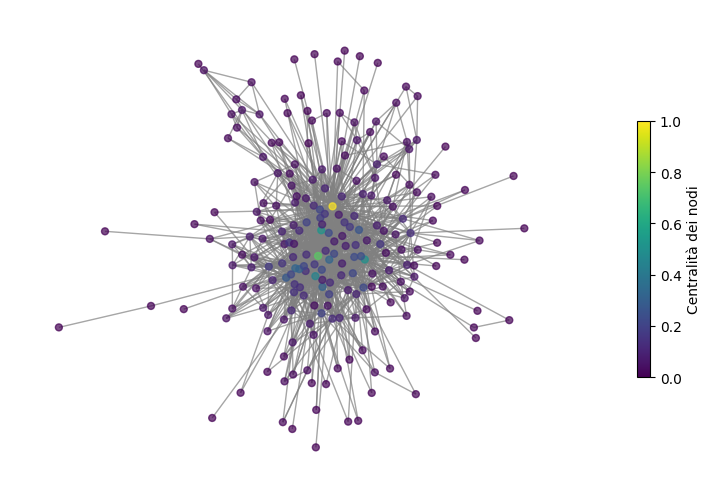

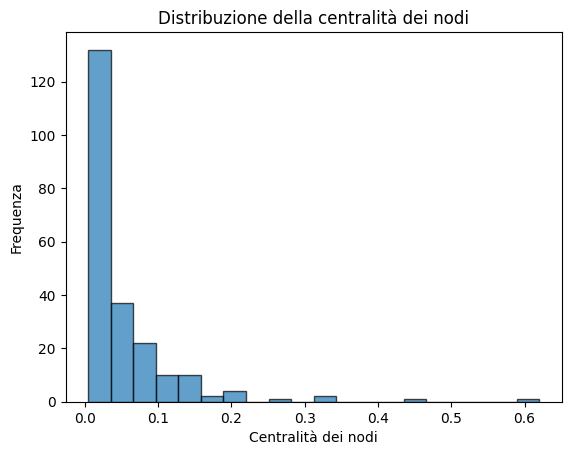

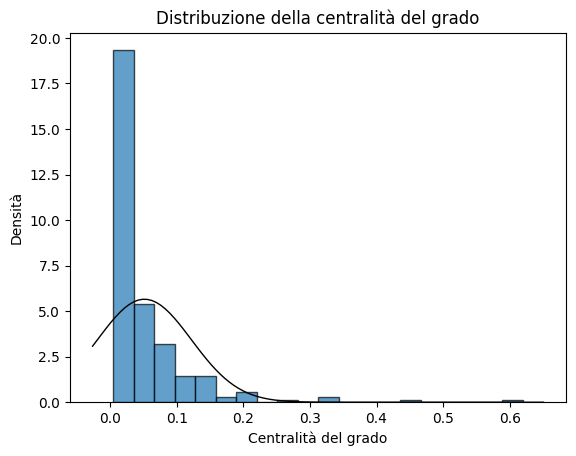

In [18]:
# Creare un grafico basato sulla centralità dei nodi con una scala di colori diversa
pos = nx.spring_layout(G)
 
# Normalizzare i valori di centralità tra 0 e 1
normalized_centrality = {node: (centrality - min(most_influential.values())) / (max(most_influential.values()) - min(most_influential.values())) for node, centrality in most_influential.items()}
 
# Creare una mappa di colori con la scala "viridis"
color_map = [plt.cm.viridis(normalized_centrality[node]) for node in G.nodes]
 
# Disegnare il grafo con la scala di colori "viridis"
nx.draw(G, pos, with_labels=False, node_size=25, node_color=color_map, font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)
 
# Aggiungere la legenda dei colori
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1, ax=plt.gca())  # Aggiunta dell'argomento ax=plt.gca()
cbar.set_label('Centralità dei nodi')
 
# Mostrare il plot
plt.show()
 
centralita_valori = list(most_influential.values())
plt.hist(centralita_valori, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Centralità dei nodi')
plt.ylabel('Frequenza')
plt.title('Distribuzione della centralità dei nodi')
plt.show()
 
centralities = list(most_influential.values())
plt.hist(centralities, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Centralità del grado')
plt.ylabel('Densità')
plt.title('Distribuzione della centralità del grado')
 
# Calcolare la PDF
mu, std = norm.fit(centralities)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
 
# Mostrare il plot della distribuzione e della PDF
plt.show()